<a href="https://colab.research.google.com/github/debizson/Mesi/blob/main/ai_database_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
# Értelmezhetőség és magyarázhatóság a gépi tanulásban tárgy projektmunkájának
# 1. mérföldköve Dinnyés Balázs Emil GI Msc hallgató beadványa

# A választott adatbázis mintám moitivációm szerint egyszerű, könnyen
# értelmezhető ezért jól vizsgálható és kellően érdekes is számomra legalábbis.
# A jövőben gazdasági folyamatokkal szertnék foglalkozni, és ez a projekt
# érdekes tanulságokat jelent a jövő kutatásaimra nézve, mint gazdasági
# tényező az emberi döntések utján.

# The data is related with direct marketing campaigns (phone calls) of a
# Portuguese banking institution. The classification goal is to predict if the
# client will subscribe a term deposit (variable y).


# Additional Information

# The data is related with direct marketing campaigns of a Portuguese banking
# institution. The marketing campaigns were based on phone calls. Often, more
# than one contact to the same client was required, in order to access if the
# product (bank term deposit) would be ('yes') or not ('no') subscribed.


# behuzom a szükséges csomagokat
import numpy as np  # numeric calculations

import pandas as pd  # data manipulation and storage

# Popular visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


%matplotlib inline

In [168]:
# letöltöm a github - ról az adatbázisomat

bank_dataset = pd.read_csv("https://raw.githubusercontent.com/debizson/Mesi/2d071a09a92563b6b0f981c8fa37c1edf9550d43/bank.csv", sep=";")


#kiiratom az adatbázist

bank_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [169]:
# Lássuk a tulajdonságokat!
bank_dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [170]:
 #  The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
 #  in order to access if the product (bank term deposit) would be (or not) subscribed.

 #  The classification goal is to predict if the client will subscribe a term deposit (variable y).

 # 5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

 # 6. Number of Attributes: 16 + output attribute.

 # 7. Attribute information:

 #  For more information, read [Moro et al., 2011].

 # Input variables:
 # bank client data:
 # 1 - age (numeric)
 # 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
 #                                     "blue-collar","self-employed","retired","technician","services")
 # 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 # 4 - education (categorical: "unknown","secondary","primary","tertiary")
 # 5 - default: has credit in default? (binary: "yes","no")
 # 6 - balance: average yearly balance, in euros (numeric)
 # 7 - housing: has housing loan? (binary: "yes","no")
 # 8 - loan: has personal loan? (binary: "yes","no")
 # related with the last contact of the current campaign:
 # 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
 # 10 - day: last contact day of the month (numeric)
 # 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 # 12 - duration: last contact duration, in seconds (numeric)
 # other attributes:
 # 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 # 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 # 15 - previous: number of contacts performed before this campaign and for this client (numeric)
 # 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 #  Output variable (desired target):
 # 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

 # 8. Missing Attribute Values: None

In [171]:
# Most összébb szedem az oszlopokat egy típusba.
features_numeric = ['age', 'balance',
         'day', 'duration' , 'campaign', 'pdays',
       'previous']
features_boolean = ['default', 'housing',
       'loan']
features_categorical = ['job', 'marital', 'education', 'contact', 'month',
       'poutcome']
target = 'y'
# összefűzöm a tulajdonságokat most már tipussal sorrendbe
features = features_numeric + features_boolean + features_categorical + [target]

In [172]:
features


['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'default',
 'housing',
 'loan',
 'job',
 'marital',
 'education',
 'contact',
 'month',
 'poutcome',
 'y']

In [173]:
bank_dataset = bank_dataset[features]
bank_dataset

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
0,30,1787,19,79,1,-1,0,no,no,no,unemployed,married,primary,cellular,oct,unknown,no
1,33,4789,11,220,1,339,4,no,yes,yes,services,married,secondary,cellular,may,failure,no
2,35,1350,16,185,1,330,1,no,yes,no,management,single,tertiary,cellular,apr,failure,no
3,30,1476,3,199,4,-1,0,no,yes,yes,management,married,tertiary,unknown,jun,unknown,no
4,59,0,5,226,1,-1,0,no,yes,no,blue-collar,married,secondary,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,no,yes,no,services,married,secondary,cellular,jul,unknown,no
4517,57,-3313,9,153,1,-1,0,yes,yes,yes,self-employed,married,tertiary,unknown,may,unknown,no
4518,57,295,19,151,11,-1,0,no,no,no,technician,married,secondary,cellular,aug,unknown,no
4519,28,1137,6,129,4,211,3,no,no,no,blue-collar,married,secondary,cellular,feb,other,no


In [174]:
# Ahhoz, hogy a tulajdonságokat jól kezleje a collab, bizonyos átalakításokat kell tennem.

In [175]:
import warnings

def enforce_dtypes(df: pd.DataFrame, cols: list, dtype):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        df[cols] = df[cols].astype(dtype)

In [176]:
# előkészítés gyanánt előszőr a yes - eket és a no - kat 1 - re és 0 - ra
# változtatom, hogy aztán jól konvertáljam bool - ra.

for column in bank_dataset.columns:
    bank_dataset.loc[bank_dataset[column] == 'yes', column] = 1.0
    bank_dataset.loc[bank_dataset[column] == 'no', column] = 0.0
    # a megfelelő számokat logikai értékekre változtatom
    if column in features_boolean + [target]:
        bank_dataset.loc[bank_dataset[column].astype('float').astype('bool'), column] = True
        bank_dataset.loc[~bank_dataset[column].astype('float').astype('bool'), column] = False
# az alap szám formátum float lesz
enforce_dtypes(bank_dataset, features_numeric, float)
# a döntési oszlpok típusa pedig bool lesz
enforce_dtypes(bank_dataset, features_boolean + [target], bool)

bank_dataset

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
0,30.0,1787.0,19.0,79.0,1.0,-1.0,0.0,False,False,False,unemployed,married,primary,cellular,oct,unknown,False
1,33.0,4789.0,11.0,220.0,1.0,339.0,4.0,False,True,True,services,married,secondary,cellular,may,failure,False
2,35.0,1350.0,16.0,185.0,1.0,330.0,1.0,False,True,False,management,single,tertiary,cellular,apr,failure,False
3,30.0,1476.0,3.0,199.0,4.0,-1.0,0.0,False,True,True,management,married,tertiary,unknown,jun,unknown,False
4,59.0,0.0,5.0,226.0,1.0,-1.0,0.0,False,True,False,blue-collar,married,secondary,unknown,may,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,-333.0,30.0,329.0,5.0,-1.0,0.0,False,True,False,services,married,secondary,cellular,jul,unknown,False
4517,57.0,-3313.0,9.0,153.0,1.0,-1.0,0.0,True,True,True,self-employed,married,tertiary,unknown,may,unknown,False
4518,57.0,295.0,19.0,151.0,11.0,-1.0,0.0,False,False,False,technician,married,secondary,cellular,aug,unknown,False
4519,28.0,1137.0,6.0,129.0,4.0,211.0,3.0,False,False,False,blue-collar,married,secondary,cellular,feb,other,False


In [323]:
# Most a zavaró  -1 - eseket kiveszem a pdays
#  jellemzőből és azt a jobban érthető
#  0 - kkal helyettesítem.
for column in bank_dataset.columns:
    bank_dataset.loc[bank_dataset['pdays'] == -1.0, 'pdays'] = 0.0

bank_dataset

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
0,30.0,1787.0,19.0,79.0,1.0,0.0,0.0,False,False,False,unemployed,married,primary,cellular,oct,unknown,False
1,33.0,4789.0,11.0,220.0,1.0,339.0,4.0,False,True,True,services,married,secondary,cellular,may,failure,False
2,35.0,1350.0,16.0,185.0,1.0,330.0,1.0,False,True,False,management,single,tertiary,cellular,apr,failure,False
3,30.0,1476.0,3.0,199.0,4.0,0.0,0.0,False,True,True,management,married,tertiary,unknown,jun,unknown,False
4,59.0,0.0,5.0,226.0,1.0,0.0,0.0,False,True,False,blue-collar,married,secondary,unknown,may,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,-333.0,30.0,329.0,5.0,0.0,0.0,False,True,False,services,married,secondary,cellular,jul,unknown,False
4517,57.0,-3313.0,9.0,153.0,1.0,0.0,0.0,True,True,True,self-employed,married,tertiary,unknown,may,unknown,False
4518,57.0,295.0,19.0,151.0,11.0,0.0,0.0,False,False,False,technician,married,secondary,cellular,aug,unknown,False
4519,28.0,1137.0,6.0,129.0,4.0,211.0,3.0,False,False,False,blue-collar,married,secondary,cellular,feb,other,False


In [324]:
# Most elvégzem a train - dev - test vágásokat a jovőre nézve, hogy hatéknyan
# tudjam a modellillesztést elvégezni tanítással, teszteléssel

# Ehhez kell a megfelelő segéd csomag
from sklearn.model_selection import train_test_split

# a vágás a következő arányban fog történni:  a 0.7(train):0.1(dev):0.2(test)
train, test = train_test_split(bank_dataset, train_size=0.8, random_state=0)
train, dev = train_test_split(train, train_size=int(len(bank_dataset)*0.7), random_state=0)
len(train), len(dev), len(test)

(3164, 452, 905)

In [325]:
# Leellenorzőm, a vágásom pontosságát

len(train)/len(bank_dataset)

0.6998451669984517

In [326]:
# Itt kiíratom a train halmazt
train

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
2963,31.0,12569.0,9.0,344.0,1.0,295.0,1.0,False,False,False,management,single,tertiary,cellular,sep,failure,True
899,51.0,10287.0,29.0,117.0,1.0,0.0,0.0,False,True,False,blue-collar,divorced,unknown,unknown,may,unknown,False
4027,45.0,265.0,28.0,14.0,3.0,0.0,0.0,False,False,False,technician,married,tertiary,cellular,aug,unknown,False
276,35.0,11219.0,12.0,699.0,2.0,79.0,1.0,False,False,False,housemaid,married,tertiary,cellular,aug,failure,False
4103,46.0,25.0,26.0,103.0,2.0,0.0,0.0,False,False,False,management,divorced,tertiary,unknown,may,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,37.0,4039.0,25.0,106.0,2.0,0.0,0.0,False,False,True,management,married,tertiary,cellular,jul,unknown,False
4332,27.0,8366.0,7.0,458.0,2.0,349.0,1.0,False,False,False,student,single,secondary,cellular,may,other,False
4217,38.0,2812.0,30.0,830.0,1.0,0.0,0.0,False,True,False,unemployed,married,tertiary,cellular,apr,unknown,True
3879,25.0,1420.0,8.0,124.0,2.0,0.0,0.0,False,False,False,admin.,single,tertiary,cellular,apr,unknown,False


In [327]:
# Mivel nincsenek hiányzó értékeim, így nincs szükségem ennek kezelésére.

# MOST KÖVETKEZIK AZ ADATVIZUALIZÁCIÓ!

<Figure size 30000x30000 with 0 Axes>

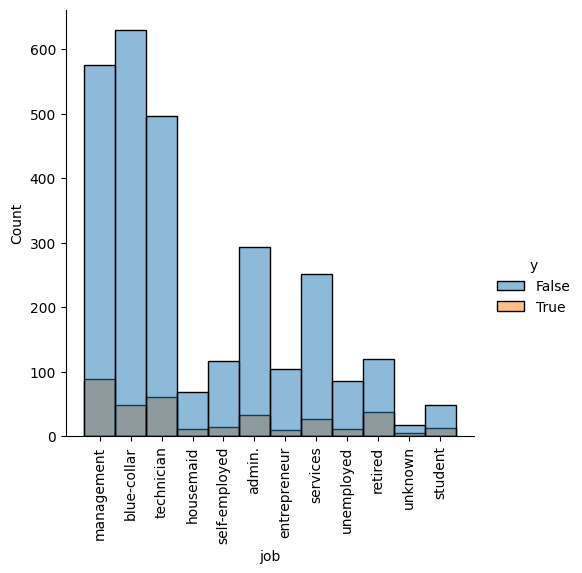

In [328]:
# Az alábbi ábrán jól látható foglalkozások szerinti eloszlás a banki ajánlat
#  elfogadása tekintetében. Az ábra azt mutatja, hogy a különböző
#  munkát végző személyek milyen eséllyel fogadják el a kampányszerű banki
#  csomagot. A diagrammon az látható többek között, hogy például a nyugdíjasok
#  (retired) arányában többen állnak kötélnek a banki ajánlatnak, mint
#  a legtöbb más munkakörben tevékenykedők. Az is mellékesen látható az oszlopok
#  magasságából, hogy a megkeresések leginkább a menedzsment, technikai, és a
#  szakmunkások(blue - collar) körében népszerűbb. Ezért ott több a pozitív válasz.

plt.figure(figsize=(300, 300))  # Ábra méretének növelése
sns.displot(data=train, kind="hist", x="job", hue="y")
plt.xticks(rotation=90)
plt.show()

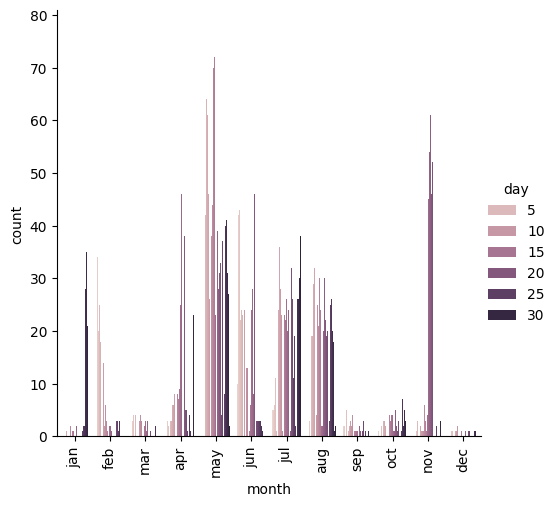

In [329]:
plot = sns.catplot(data=train, kind="count", x="month", hue="day", order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plot.set_xticklabels(rotation=90)

# A munka a banknál leginkább a melegebb hónapokban jellemző, ami jól látható az
#  ábrán. Azon belül is május a legsűrűbb időszak. A téli hónapoknál egyedül
#  január vége február elejei kötődés és még novemberben van kiugrás.
#  A többi hidegebb időszakban nagy a pangás. Úgy látszik a rossz időjárás
#  a befektetni való kedvet is elveszi a kuncsaftoknál.

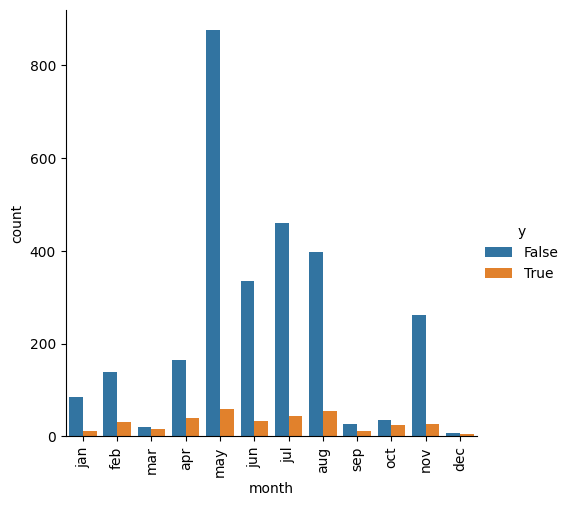

In [330]:
plot = sns.catplot(data=train, kind="count", x="month", hue="y", order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plot.set_xticklabels(rotation=90)

# Most az előző diagram, változtatva a hónapok szerint, de a kisebb felbontás
#  egy hónapra a y címke változót mutatja. Azaz látható, hogy arányosan
#  a forgalomhoz képest a nyári hónapokban fogadnak ell több ajánlatot

<Axes: xlabel='marital', ylabel='age'>

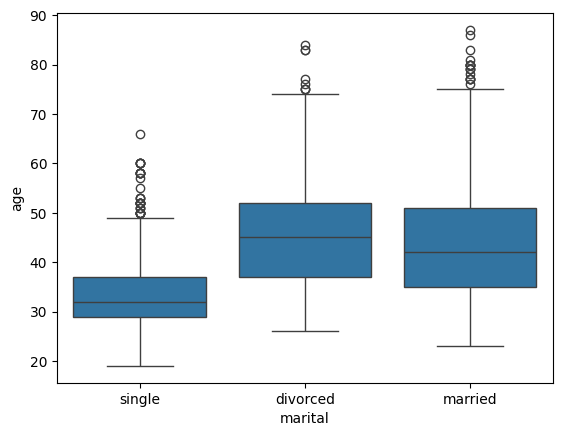

In [331]:
sns.boxplot(x="marital", y="age", data=train)
# Itt már a családi állapot, azon belül a házassági állapotot veszem górcső alá.
# A megkeresések családi állapot és a kor eloszlásában medián és a
# kvartilisek terén.
# Az elváltak tekintetében a nagyobb aktivitásra a kicsit magasabb kor
# a jellemző, mint a szingli és házasok között.
# A szigli megkeresésekre a fiatalabb érdeklődés a jellemző.
# Minden csoportban láthatóan vannak outsider - ek,
# azaz durván kiugró példányok, amik kevésbé reprezentálják az ábra többi részét,
# azaz a boxplotot.

<ipython-input-332-e9f979e9847d>:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.catplot(data=train, kind="violin", scale="count", x="marital", y="age", hue="y", linewidth=0.4)


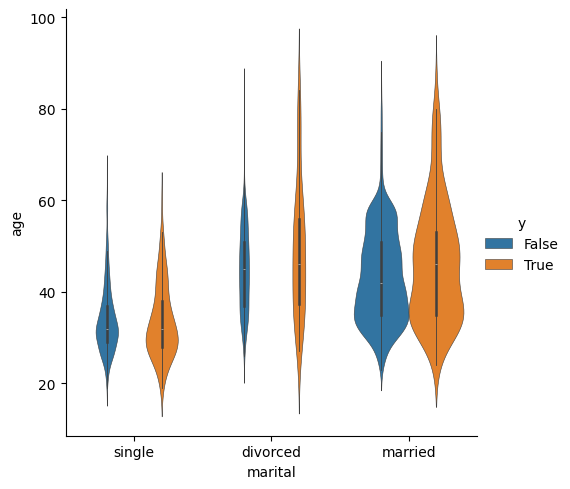

In [332]:
# Most ugyanazt vizsgálom, mint fent, csak még mellé veszem a cél
#  faktort, ami boolean típusú, azaz elfgadta vagy nem az ajánlatot.
#  Látható, hogy a különféle helyzetekben házas, elvált, szingli jó formán
#  eléggé láthatóan ugyanaz a koroszály fogadja el és utasítja el hasonló
#  hányadban.

sns.catplot(data=train, kind="violin", scale="count", x="marital", y="age", hue="y", linewidth=0.4)



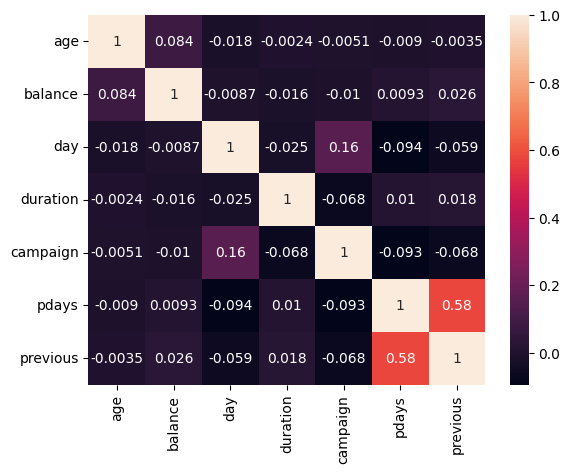

In [333]:
# Most a numerikus feature - ok együttmozgásának mértékét, az úgynevezett
#  korrelációt vizsgálom. A pozítiv együtt mozgásra nézek teljesülést.
#  Különböző párok másképp viselkedhetnek és viselkednek is, aminek lehet érdekes
#  de lehet kézenfekvő oka. Az utóbbira példa a previous, a kampány előtti konataktok
#  száma és a pdays, a utolsó és a mostani kampány közötti eltelt napok számának
#  együttmozgása. Nyilvánvalóan minél több nap telt el, annál több lehetett a megelőző
#  kontakt.
#  Viszont érdekes az együttmozgás a campaign változó és a day között. Úgy látszik
#  bár gyengén, hogy minél több kontaktja volt a kliensnek a
#  jelenlegi ajánlatban, anál inkább az utolsó napon történik ez meg a hónapban.
#  Vagyis a komolyan érdeklődő ügyfelek valószínűleg a fizetés előtt látják
#  jobban az anyagi helyzetüket. Hogy mit engedhetnek meg magunknak végső soron.
#  Ezzel érdemes a banknak számolni!


corr = bank_dataset[features_numeric].corr()

sns.heatmap(corr,annot = True)


plt.show()



In [334]:
# Itt látható a kapcsolat a day és a campaign között,
#  hogy a hónap melyik napján vannak a hívások
#  A hónap végefele enyhén növekszik az aktivitás,


alt.Chart(bank_dataset).mark_point().encode(
    x='day',
    y='campaign'
).interactive()

alt.Chart(...)

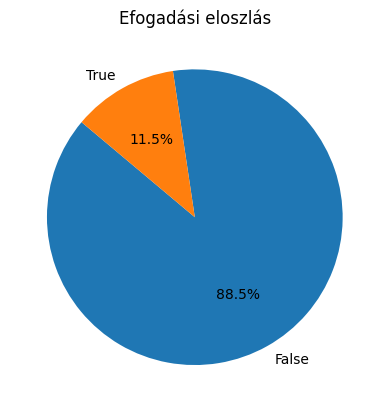

In [335]:
# Az ügyfelek végleges reakciója, azaz az y címke eloszlása

eloszlas = bank_dataset['y'].value_counts()
plt.pie(eloszlas, labels=eloszlas.index, autopct='%1.1f%%', startangle=140)
plt.title('Efogadási eloszlás')

plt.show()

In [336]:
# Címkék eloszlásának megtekintése
eloszlas = bank_dataset['y'].value_counts()

print(eloszlas)

y
False    4000
True      521
Name: count, dtype: int64


In [337]:
# Itt az látszik, hogy az előző kampány óta, átlagosan 41 nap telt el egy
#  kliensnél úgy, hogy újra fel lett hívva. Tehát úgy,
#  hogy a -1 - esek ki vannak cserélve 0 - kra az adatbázisban.
#  Átlag kiszámítása:
atlag = bank_dataset['pdays'].mean()

print(f'Az érték(pdays) átlaga: {atlag}')

Az érték(pdays) átlaga: 40.58615350586153


In [338]:
# Itt a csökkenő hozadék elve szerint azt mutatom, hogy
#  2.27 db hívást érdemes megtenni a cél érdekében, afelett már inkáb esélytelen
#  a próbálkozás, mert 2.9 hívás az átlaga a sikertelnnek.

atlagok = bank_dataset.groupby('y')['campaign'].mean().reset_index()

atlagok



,y,campaign
0,False,2.862250
1,True,2.266795


Text(0.5, 0, 'címke')

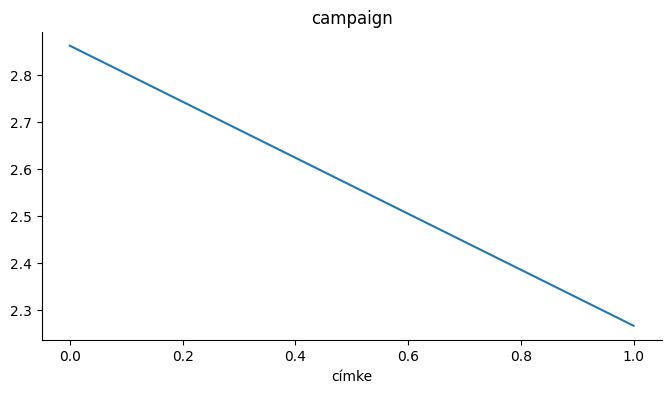

In [339]:
# Látható, hogy inkább a 2.3 db hívás fele érdemes haladni a cél érdekében,
#  mint inkább a 2.8 fele.

from matplotlib import pyplot as plt
atlagok['campaign'].plot(kind='line', figsize=(8, 4), title='campaign')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('címke')


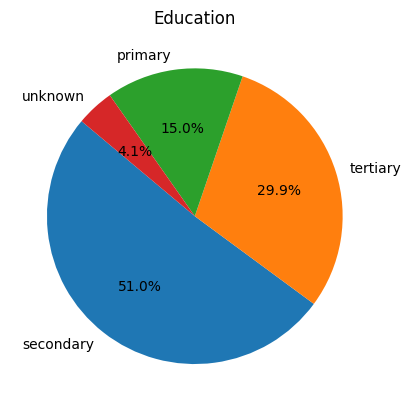

In [340]:
# Az ügyfelek közti iskolázottsági eloszlások

eloszlas = bank_dataset['education'].value_counts()
plt.pie(eloszlas, labels=eloszlas.index, autopct='%1.1f%%', startangle=140)
plt.title('Education')

plt.show()

In [341]:
!pip install graphviz imodels
!pip install --upgrade scikit-learn~=1.3.2


In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# %matplotlib widget  # for jupyter-lab

In [343]:
train

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,y
2963,31.0,12569.0,9.0,344.0,1.0,295.0,1.0,False,False,False,management,single,tertiary,cellular,sep,failure,True
899,51.0,10287.0,29.0,117.0,1.0,0.0,0.0,False,True,False,blue-collar,divorced,unknown,unknown,may,unknown,False
4027,45.0,265.0,28.0,14.0,3.0,0.0,0.0,False,False,False,technician,married,tertiary,cellular,aug,unknown,False
276,35.0,11219.0,12.0,699.0,2.0,79.0,1.0,False,False,False,housemaid,married,tertiary,cellular,aug,failure,False
4103,46.0,25.0,26.0,103.0,2.0,0.0,0.0,False,False,False,management,divorced,tertiary,unknown,may,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,37.0,4039.0,25.0,106.0,2.0,0.0,0.0,False,False,True,management,married,tertiary,cellular,jul,unknown,False
4332,27.0,8366.0,7.0,458.0,2.0,349.0,1.0,False,False,False,student,single,secondary,cellular,may,other,False
4217,38.0,2812.0,30.0,830.0,1.0,0.0,0.0,False,True,False,unemployed,married,tertiary,cellular,apr,unknown,True
3879,25.0,1420.0,8.0,124.0,2.0,0.0,0.0,False,False,False,admin.,single,tertiary,cellular,apr,unknown,False


In [344]:
# Kialakítom a bináris fához a x és y szetteket.

train_x=train[features_numeric]
train_y = train[["y"]]
test_x = test[features_numeric]
test_y = test[["y"]]
dev_x = dev[features_numeric]
dev_y = dev[["y"]]

In [345]:
train_x

,age,balance,day,duration,campaign,pdays,previous
2963,31.0,12569.0,9.0,344.0,1.0,295.0,1.0
899,51.0,10287.0,29.0,117.0,1.0,0.0,0.0
4027,45.0,265.0,28.0,14.0,3.0,0.0,0.0
276,35.0,11219.0,12.0,699.0,2.0,79.0,1.0
4103,46.0,25.0,26.0,103.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
4230,37.0,4039.0,25.0,106.0,2.0,0.0,0.0
4332,27.0,8366.0,7.0,458.0,2.0,349.0,1.0
4217,38.0,2812.0,30.0,830.0,1.0,0.0,0.0
3879,25.0,1420.0,8.0,124.0,2.0,0.0,0.0


In [346]:
train_y

,y
2963,True
899,False
4027,False
276,False
4103,False
...,...
4230,False
4332,False
4217,True
3879,False


In [347]:
# Az osztályozásos döntési fa modellt választottam a folytonos attributumokra
#  és a diszkrét címkére
# Meghatározom a legjobb paramétereket

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


ParDepthArray = [2,4,6,10]

ParSplitArray = [2,5,10,20]

ParLeafArray = [2,5,10,20]

max = 0;

for i in ParDepthArray:
  for j in ParSplitArray:
    for k in ParLeafArray:
      classification_tree = DecisionTreeClassifier(random_state=0, max_depth=i, min_samples_split = j, min_samples_leaf = k)
      classification_tree.fit(train_x, train_y)
      accuracy = accuracy_score(test_y, classification_tree.predict(test_x))
      if max < accuracy:
        max = accuracy
        maxclassification_tree = classification_tree
        print(f"eddigi legjobb pontosság: {max}")

print(f"A modell max pontossága: {max}")

eddigi legjobb pontosság: 0.876243093922652
eddigi legjobb pontosság: 0.881767955801105
eddigi legjobb pontosság: 0.8883977900552487
eddigi legjobb pontosság: 0.8895027624309392
A modell max pontossága: 0.8895027624309392


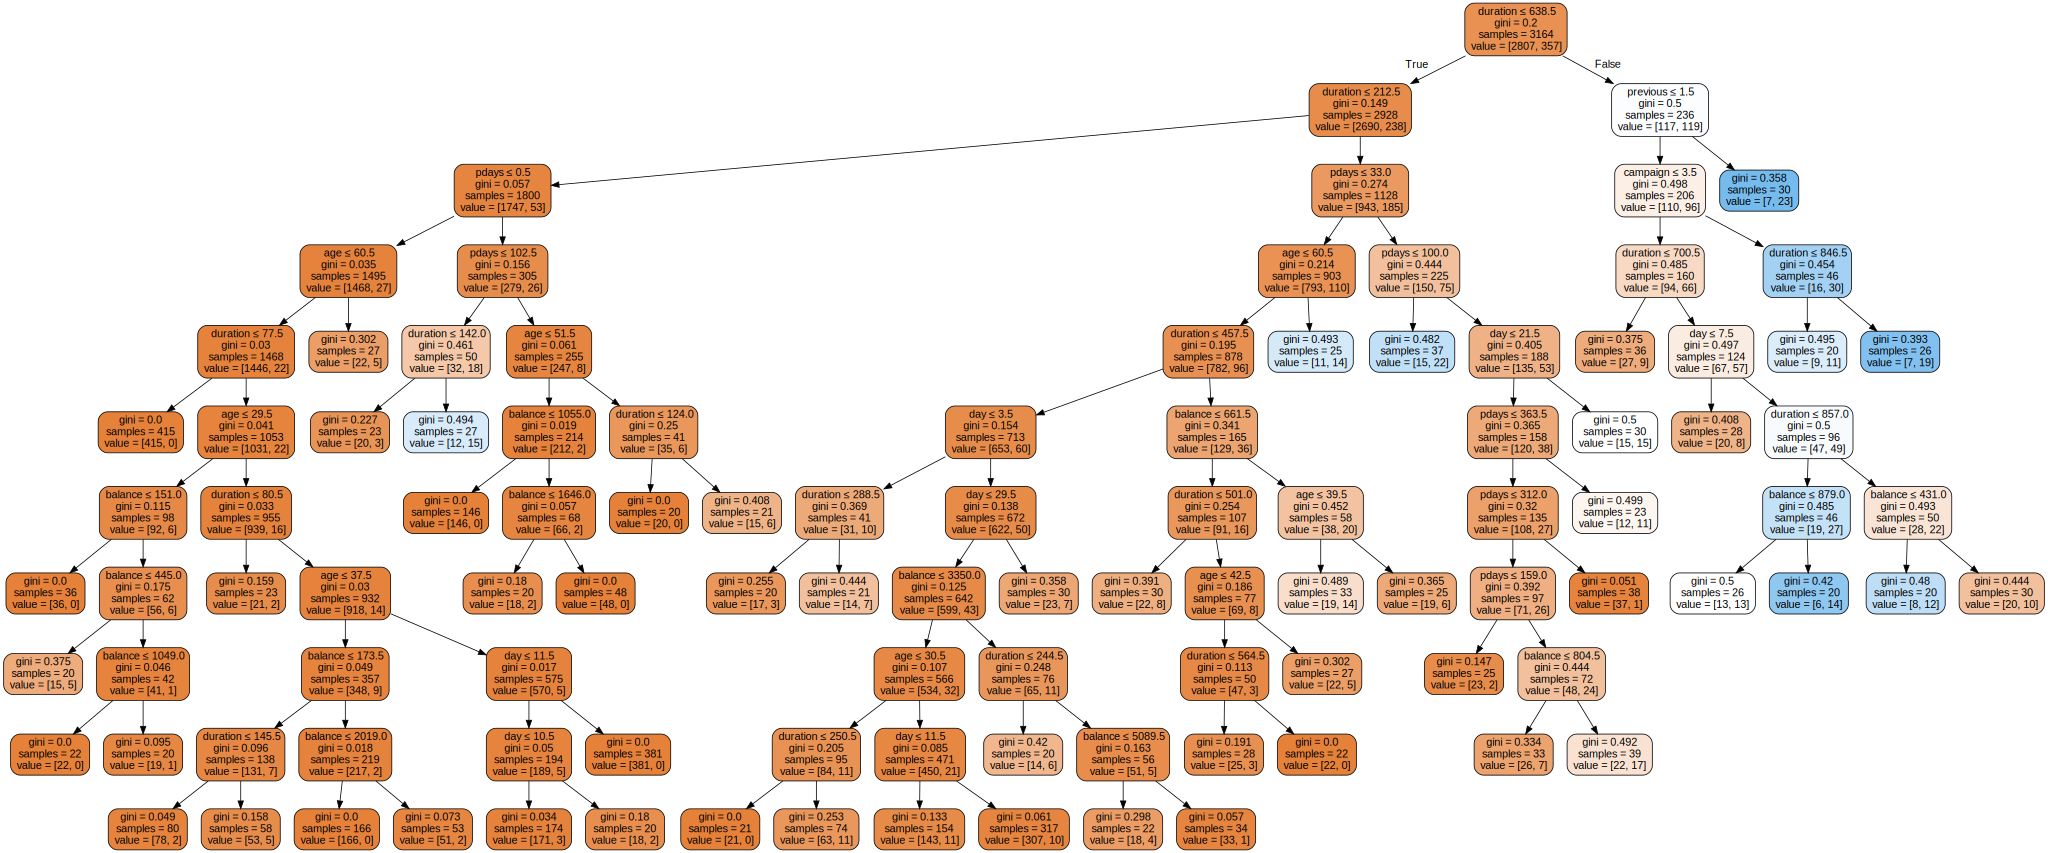

In [348]:
# A legjobb paraméterekkel felállított fa

import graphviz
import sklearn.tree as tree

dot_data = tree.export_graphviz(maxclassification_tree, out_file=None, feature_names=train_x.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [349]:
# A tulajdonságok fontossága azt mondja meg, hogy mennyire játszanak döntő szerepet
#  a modell működése során. Látszik, hogy a hívás időtartma az egy döntő
#  szempont

classification_tree.feature_importances_

array([0.07324655, 0.05470451, 0.04793738, 0.58326346, 0.01941014,
       0.19905242, 0.02238554])

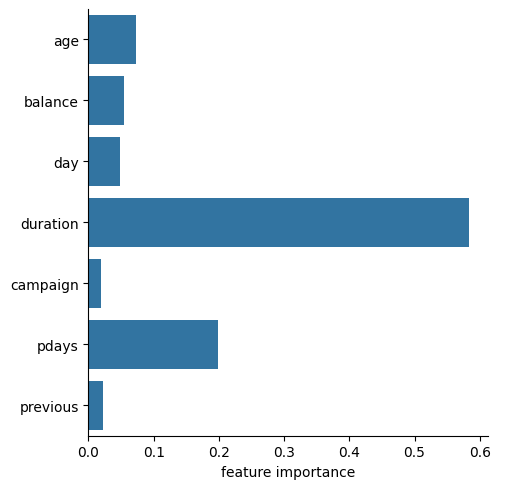

In [350]:
feature_importances = pd.DataFrame(data=classification_tree.feature_importances_, columns=["feature importance"], index=train_x.columns)

sns.catplot(kind="bar", data=feature_importances, y=train_x.columns.to_list(), x="feature importance", orient="h")

In [351]:
# Most LOKÁLIS vizsgálatot végzek

# ICE

# Egy kiemelt feature hatását nézem a targetként kiválasztott feature-re
# nézve úgy, hogy veszek adott számú pontot és mindnek a kiemelt feature - ének
# adok egy range - ben értékeket és így vizsgálódok, a többi feature értékét
#  ugyanúgy hagyom.
# Úgy döntöttem, hogy a target - ként eddig szereplő y - t(yes, no) most kiveszem,
# és másikat választok, a pdays - re tanítok és így vizsgálom
# a yes(igen) adathalamzt.
# Így egy folytonos target jellmezőt is vizsgálhatok, mert számomra az érdekesebb
#  most.

# eddigi kód ez volt:

#train_x=train[features_numeric]
#train_y = train[["y"]]
#test_x = test[features_numeric]
#test_y = test[["y"]]
#dev_x = dev[features_numeric]
#dev_y = dev[["y"]]

#változtatás, előkészítés

features_numeric_changed = [
         'day', 'campaign' , 'balance',
       'previous', 'y', 'age', 'duration']

target = 'pdays'

#- pdays: number of days that passed by after the client was last contacted from a previous campaign
# vagyis azt lehet megjósolni, hogy (egy pozitív kimenetelnél), hogyan érdemes
# számolni, mennyi napot kell várni egy előző kampány után a kapcsolat felvétellel

# Eltávolítottam az 'pdays' jellemzőt a features_numeric listából

# Hozzáadtam az 'y' jellemzőt ideglenesen a features_numeric listához





# Adatkészletek módosítása
train_x = train[features_numeric_changed]


test_x = test[features_numeric_changed]


dev_x = dev[features_numeric_changed]

train_x




,day,campaign,balance,previous,y,age,duration
2963,9.0,1.0,12569.0,1.0,True,31.0,344.0
899,29.0,1.0,10287.0,0.0,False,51.0,117.0
4027,28.0,3.0,265.0,0.0,False,45.0,14.0
276,12.0,2.0,11219.0,1.0,False,35.0,699.0
4103,26.0,2.0,25.0,0.0,False,46.0,103.0
...,...,...,...,...,...,...,...
4230,25.0,2.0,4039.0,0.0,False,37.0,106.0
4332,7.0,2.0,8366.0,1.0,False,27.0,458.0
4217,30.0,1.0,2812.0,0.0,True,38.0,830.0
3879,8.0,2.0,1420.0,0.0,False,25.0,124.0


In [398]:
# az x adathalmaz különválasztása, hogy csak a pozitív kimeneteket vizsgáljam


# Train adatkészlet szétválasztása
train_x_yes = train_x[train_x['y'] == True]
train_x_no = train_x[train_x['y'] == False]


# Test adatkészlet szétválasztása
test_x_yes = test_x[test_x['y'] == True]
test_x_no = test_x[test_x['y'] == False]

# Dev adatkészlet szétválasztása
dev_x_yes = dev_x[dev_x['y'] == True]
dev_x_no = dev_x[dev_x['y'] == False]



# A végleges halmazok a y nélkül

features_numeric_changed = [
         'day', 'campaign' , 'duration',
       'previous', 'age', 'balance']


train_x_yes = train_x_yes[features_numeric_changed]
train_x_no = train_x_no[features_numeric_changed]

test_x_yes = test_x_yes[features_numeric_changed]
test_x_no = test_x_no[features_numeric_changed]

dev_x_yes = dev_x_yes[features_numeric_changed]
dev_x_no = dev_x_no[features_numeric_changed]


In [399]:
# az target adathalmaz különválasztása

# Train adatkészlet szétválasztása
train_y_yes = train[train['y'] == True]
train_y_yes = train_y_yes[target]
train_y_no = train[train['y'] == False]
train_y_no = train_y_no[target]

# Test adatkészlet szétválasztása
test_y_yes = test[test['y'] == True]
test_y_yes = test_y_yes[target]
test_y_no = test[test['y'] == False]
test_y_no = test_y_no[target]

# Dev adatkészlet szétválasztása
dev_y_yes = dev[dev['y'] == True]
dev_y_yes = dev_y_yes[target]
dev_y_no = dev[dev['y'] == False]
dev_y_no = dev_y_no[target]

dev_y_yes



,pdays
1767,375.0
1276,185.0
1179,0.0
1342,334.0
3844,364.0
215,0.0
2985,0.0
4402,0.0
3673,0.0
732,0.0


In [394]:
from sklearn.ensemble import RandomForestRegressor

# speciális átlagoló fákkal megtörténik a betanítás

reg = RandomForestRegressor(random_state=0)
reg.fit(train_x_yes, train_y_yes)

train_y_yes


,pdays
2963,295.0
2988,414.0
3160,0.0
2633,0.0
3135,0.0
...,...
3502,185.0
862,0.0
4275,0.0
4388,0.0


In [407]:
from sklearn.metrics import r2_score

r2_score(test_y_yes, reg.predict(test_x_yes))

# A hiba arány jó, az R - négyzetes hiba viszonylag jól magyarázza a modell
#  jósolandó pontjait



0.4928951348492294

In [396]:
test_y_yes

,pdays
2033,0.0
1504,0.0
1343,100.0
619,182.0
3064,474.0
...,...
3723,0.0
3681,0.0
2049,91.0
30,0.0


In [397]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Az ICE Plot felparaméterezése, 30 adatpontot vizsgálunk
#  ebbe lesznek 0 targetűek is, mert lehet, hogy nem volt
#  a kliensnek előző kampánybeli részvétele

def ice_plot(data, target_variable, lower_bound, upper_bound, model, step_size=1, limit=30):
    for k, (i, x) in enumerate(dev_x_yes.iterrows()):
        if k == limit:
            break
        # values for x
        alternative = np.arange(lower_bound, upper_bound, step_size)
        # duplicating data N times (N=[upper_bound-lower_bound]/step_size)
        x_altered = np.tile(x.values, (len(alternative), 1))
        x_altered[:, dev_x_yes.columns.get_loc(target_variable)] = alternative
        # reconstructing data
        id_ = x.name
        cols = list(x.index)
        x_altered = pd.DataFrame(data=x_altered, columns=cols)
        # predictions
        pred = model.predict(x_altered)
        # plotting
        plt.plot(alternative, pred)
        plt.xlabel(target_variable)
        plt.ylabel('predictions')
dev_y_yes

,pdays
1767,375.0
1276,185.0
1179,0.0
1342,334.0
3844,364.0
215,0.0
2985,0.0
4402,0.0
3673,0.0
732,0.0


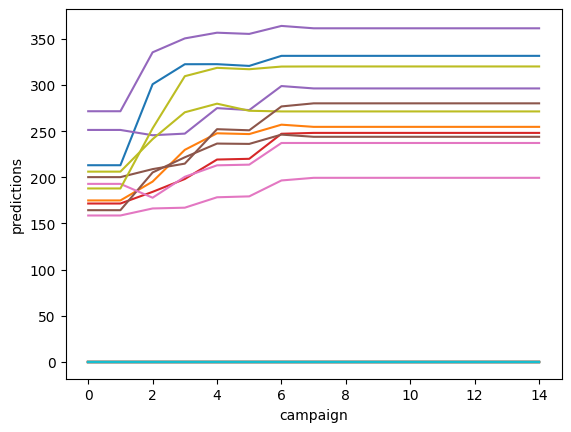

In [383]:
ice_plot(dev_x_yes, 'campaign', 0, 15, reg)

# Látható a kiértékelhető pontokról, (ahol nem 0 a pdays), hogy, ha növeljük a
# kontaktok számát(campaign), akkor jó eséllyel a padys, azaz
#  az utolsó kapmányhoz tartozó utolsó kontakt utáni idő is növekszik
#  Tehát a kontaktok számával növekszik a target érték is. Minél
#  régebb óta beszélt a pozitív kimenetelű kliens egy előző
#  akció keretében a céggel vagy más céggel, utánna annál több kontakra van szükség
#  , ami jól követi a valós logikát is. Vagyis lehet, már nem olyan tájékozott
#  a sok idő elmulása miatt, igy több megbeszélésre van szükség
#

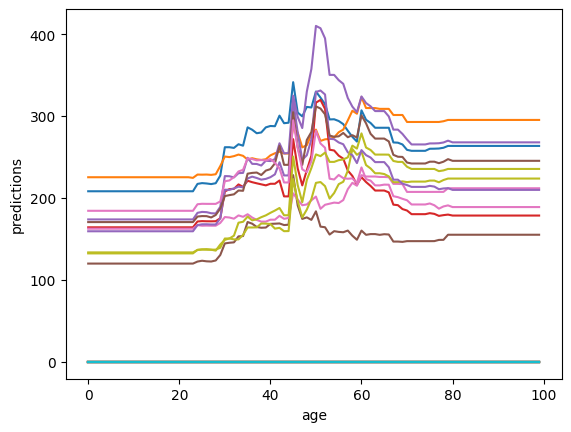

In [384]:

ice_plot(dev_x_yes, 'age', 0, 100, reg)

# körülbelül 50 év körüli kornál lesz több ideje, hogy beszélt a kliens egy előző
#  kampány során a céggel, láthatóak a kiugrások


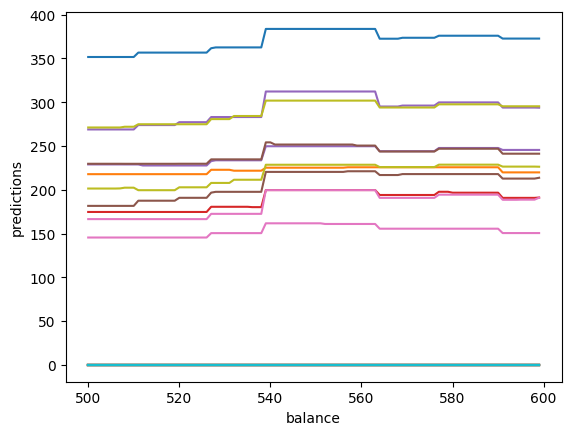

In [404]:
ice_plot(dev_x_yes, 'balance', 500, 600, reg)

# 540 - egyenlegnél érezhető ugrás van a target - en.
# 550 körüli és közvetlen 2000 euro feletti egyenlegnél a target megugrik
# egyébként jó egyenletes minenhol, ezt abból látom, ha növelem
#  a paraméterekben a bound - okat.

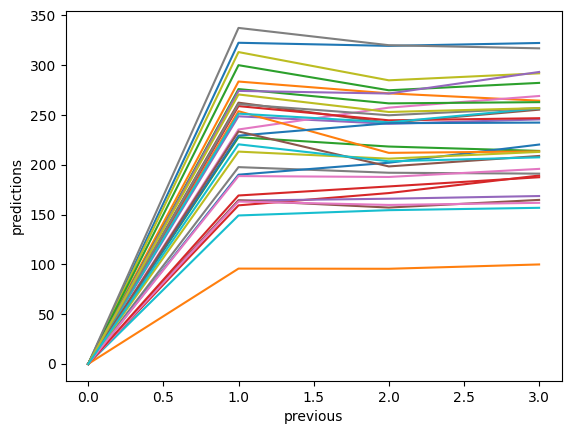

In [406]:
ice_plot(dev_x_yes, 'previous', 0, 4, reg)

# previous: number of contacts performed before this campaign and for this client (numeric)

# 1 napról a 2 - re van csökkenés a targetben.
# Az előző kontaktok 5 - ről 7 - re növelése eredményez érezhető változást még
# növekedést, aztán vissza változik. ez ugyancsak akkor látom, ha növelem a bound - okat.

In [ ]:
# GLOBÁLIS vizsgálat

# A választott módszerem a PDP from ICE

# A fenti ICE plot vigygálattól ez annyiban különbözik, hogy a
#  többi feature - ra átlagolva számolom az összes adatpontra.



Index(['day', 'campaign', 'duration', 'previous', 'age', 'balance'], dtype='object')


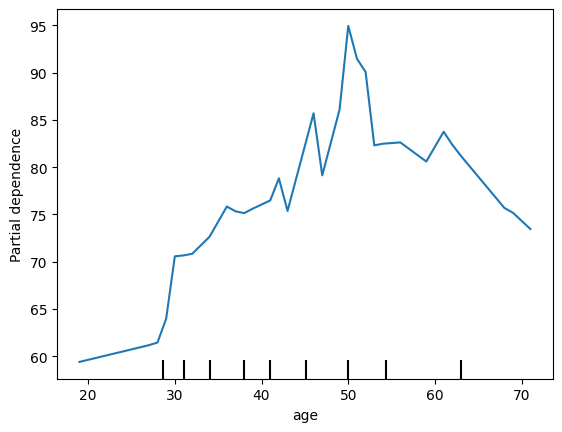

In [373]:
from sklearn.inspection import PartialDependenceDisplay

print(train_x_yes.columns)

PartialDependenceDisplay.from_estimator(reg, dev_x_yes, ['age'], method='brute')

# Az ötven éves kor szerinti kiugrás itt is jól látható

Index(['day', 'campaign', 'duration', 'previous', 'age', 'balance'], dtype='object')


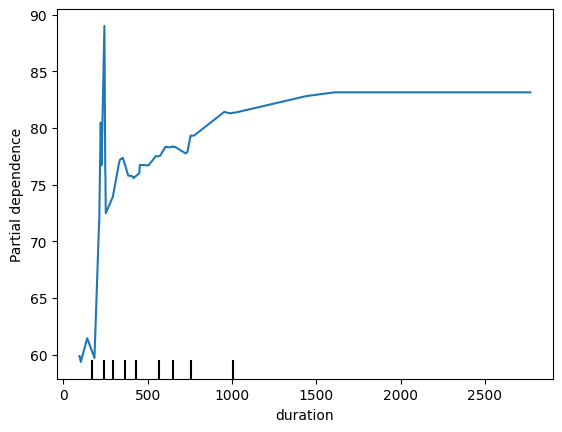

In [388]:
from sklearn.inspection import PartialDependenceDisplay

print(train_x_yes.columns)

PartialDependenceDisplay.from_estimator(reg, dev_x_yes, ['duration'], method='brute')
# A megbeszélések időtartama, ha növekszik, akkor enyhén a target is. Látható
#  milyen tartományokban.

Index(['day', 'campaign', 'duration', 'previous', 'age', 'balance'], dtype='object')


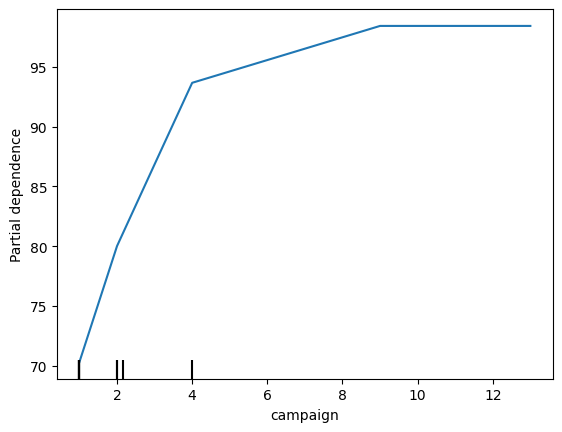

In [375]:
from sklearn.inspection import PartialDependenceDisplay

print(train_x_yes.columns)

PartialDependenceDisplay.from_estimator(reg, dev_x_yes, ['campaign'], method='brute')
# itt a globális vizsgálat is megerősíti, hogy ha nő a kontatktok szám
#  a target is nő

Index(['day', 'campaign', 'duration', 'previous', 'age', 'balance'], dtype='object')


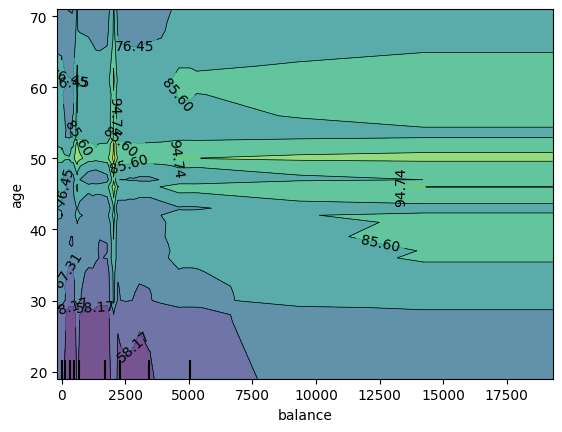

In [376]:
from sklearn.inspection import PartialDependenceDisplay

print(train_x_yes.columns)

PartialDependenceDisplay.from_estimator(reg, dev_x_yes,[('balance', 'age')], method='brute')

# Látható, hogy ha az egyenleg és a kor is az alsó tartományban van,
#  akkor a target a legkisebb értékeket prediktálja. Tehát egy fiatal
#  és kevés euro egyenleggel a számláján kevesebb idő óta
#  beszélt egy másik kampány keretében, érdekes!